## Acquisition of elevation data
>In order from the left, "the number of that point", "latitude", "longitude", "elevation", and "distance from point 0". The units of altitude and distance are meters. Data for 300 locations.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


## [Problem 1] Visualization of data
Visualize elevation data using Matplotlib. If you set "the number of the point" on the horizontal axis and "elevation" on the vertical axis, you can draw a cross-sectional view of Mt. Fuji.

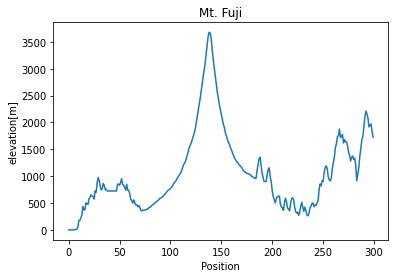

In [2]:
plt.title("Mt. Fuji")
plt.plot(fuji[:,0], fuji[:,3])
plt.xlabel("Position")
plt.ylabel("elevation[m]")
plt.show()

## [Problem 2] Create a function to calculate the gradient of a point
Create a function that calculates the gradient based on the relationship between the "current point number" and the "elevation".

In [3]:
def cal_gradient(current, elevation):
    return elevation[current] - elevation[current-1]

In [4]:
gradient = cal_gradient(136,fuji[:,3])
gradient

168.35000000000036

## [Problem 3] Create a function to calculate the destination
Create a function that calculates the next destination based on the information on the gradient of the current location.

$$
\text{destination point} = \text{current point} - \alpha
\times \text{Gradient at the current location}
$$

In [5]:
def cal_destination(position, elevation, alpha = 0.2):
    destination = position - alpha * cal_gradient(position,elevation)
    destination = np.maximum(1,destination)
    destination = np.minimum(len(elevation)-1, destination)
    destination = np.round(destination).astype(int)
    return destination

In [6]:
position = np.arange(300)
destination = cal_destination(position, fuji[:,3])
destination

array([299,   1,   2,   3,   4,   5,   5,   7,   7,   1,   1,  10,   2,
         4,   1,  27,  14,   1,  22,  21,   1,  15,  13,  28,  24,  36,
         1,  31,   1,  10,  41,  51,  47,  27,  15,  43,  52,  35,  44,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  22,  49,  54,  41,
        37,  74,  58,  63,  66,  35,  80,  59,  73,  83,  64,  74,  52,
        76,  74,  66,  76,  64,  78,  81,  73,  70,  74,  75,  75,  75,
        77,  73,  80,  77,  79,  80,  81,  82,  83,  84,  85,  85,  87,
        88,  90,  89,  88,  93,  90,  92,  95,  96,  96,  96,  98,  95,
        99, 100, 102,  99, 103, 102, 105, 102, 100, 102, 110, 104, 102,
       103, 103, 108, 113, 109, 109, 112, 110, 104, 101, 103, 106, 105,
       103, 103, 108, 105, 110,  99, 102, 104, 122, 142, 159, 185, 177,
       173, 175, 175, 175, 170, 171, 168, 169, 168, 172, 165, 175, 165,
       170, 168, 165, 172, 168, 172, 171, 173, 169, 172, 169, 174, 172,
       173, 174, 178, 178, 176, 177, 178, 177, 178, 180, 181, 18

## [Problem 4] Creating a function to go down the mountain
Create a function that goes down the mountain. Receive the first point and update the point with the function in question 3. Record the points for each move in a list, etc., and use this as the return value of the function.


The first "current point" is the 136th point (elevation 3434.59 [m]) near the top of Mt. Fuji. Let's go down the mountain from here.

In [7]:
def go_down(start, elevation, alpha = 0.2):
    down = [start]
    while (down[-1] not in down[:-1]):
        down.append(cal_destination(down[-1], elevation, alpha = alpha))
    return down[:-1]

In [8]:
start = 136
down = go_down(start, fuji[:,3])
down

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

## [Problem 5] Visualization of the descent process
Visualize the descending process in problem 4 using Matplotlib.
- Display points moved in cross section as dots
- Make a line graph of the altitude and slope for each iteration

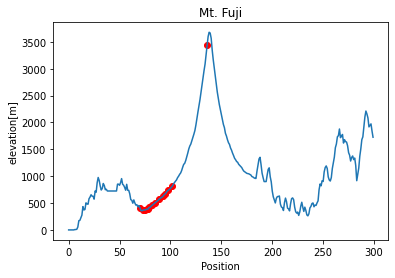

In [9]:
plt.title("Mt. Fuji")
plt.plot(fuji[:,3])
plt.scatter(down, fuji[down,3],color='r')
plt.xlabel("Position")
plt.ylabel("elevation[m]")
plt.show()

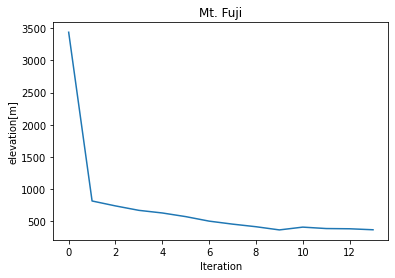

In [10]:
plt.title("Mt. Fuji")
plt.plot(fuji[down,3])
plt.xlabel("Iteration")
plt.ylabel("elevation[m]")
plt.show()

## [Problem 6] Change of initial value
In Question 4, the first "where you are" was 136, but calculate this for all other points. Then, visualize what kind of descent process will occur for some initial values as in Problem 5. In machine learning, it can be confirmed that how to set the initial value affects the result.

The value like the first point in this example is called the initial value. If you change this, the result will change. For example, at 136 and 142 you will be descending different slopes of Mt. Fuji.

In [11]:
start1 = 142
down1 = go_down(start, fuji[:,3])
down1

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

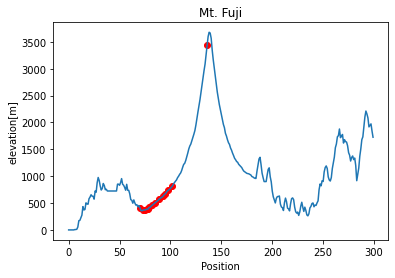

In [12]:
plt.title("Mt. Fuji")
plt.plot(fuji[:,3])
plt.scatter(down1, fuji[down1,3],color='r')
plt.xlabel("Position")
plt.ylabel("elevation[m]")
plt.show()

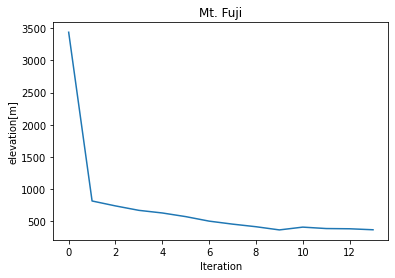

In [13]:
plt.title("Mt. Fuji")
plt.plot(fuji[down1,3])
plt.xlabel("Iteration")
plt.ylabel("elevation[m]")
plt.show()

## [Problem 7] (Advance problem) Change hyperparameters
Hyperparameters α
Visualize the descending process when you change as in question 5. And make sure that the results vary greatly depending on the hyperparameters.

In [14]:
start2 = 136
down2 = go_down(start, fuji[:,3], alpha = 0.1)
down2

[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]

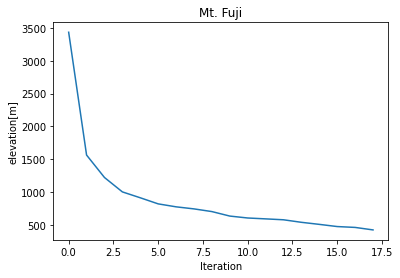

In [15]:
plt.title("Mt. Fuji")
plt.plot(fuji[down2,3])
plt.xlabel("Iteration")
plt.ylabel("elevation[m]")
plt.show()

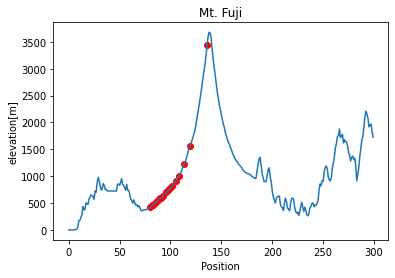

In [16]:
plt.title("Mt. Fuji")
plt.plot(fuji[:,3])
plt.scatter(down2, fuji[down2,3],color='r')
plt.xlabel("Position")
plt.ylabel("elevation[m]")
plt.show()